In [4]:
print('Hello World')

Hello World


In [5]:
file_pulldata="C:\\Users\\sydne\\Documents\\Programming\\BTCScrape\\BTCpulldata.csv"

In [6]:
file_volume="C:\\Users\\sydne\\Documents\\Programming\\BTCScrape\\BTCvolume.csv"

In [54]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

In [8]:
pull_df=pd.read_table(file_pulldata, sep=",")

In [9]:
vol_df=pd.read_table(file_volume, sep=",")

In [10]:
pull_df.head()

,Label,Date,Users,Description,URL
0,Android,8/11/2019,laanwj,Accelerated SHA256 with ARM64 crypto extensions?,https://github.com/bitcoin/bitcoin/issues/17414
1,Android,23/10/2019,icota,Qt: Add Android packaging support,https://github.com/bitcoin/bitcoin/pull/17227
2,Android,16/9/2019,icota,WIP: Qt: add QML based mobile GUI,https://github.com/bitcoin/bitcoin/pull/16883
3,Android,8/8/2019,BlockMechanic,depends : aarch64 android including QT,https://github.com/bitcoin/bitcoin/issues/16568
4,Android,5/6/2018,Sjors,ARMv8 sha2 support,https://github.com/bitcoin/bitcoin/issues/13401


In [11]:
vol_df.head()

,Timestamp,trade-volume
0,2019-11-19 0:00:00,9.803936e+07
1,2019-11-20 0:00:00,8.079782e+07
2,2019-11-21 0:00:00,6.231722e+07
3,2019-11-22 0:00:00,1.525656e+08
4,2019-11-23 0:00:00,2.831210e+08


In [12]:
pd.pivot_table(pull_df, columns='Date', aggfunc='count')

Date,1/10/2014,1/10/2019,1/10/2020,1/11/2019,1/2/2013,1/2/2017,1/4/2019,1/5/2019,1/5/2020,1/6/2017,...,9/4/2020,9/5/2020,9/6/2020,9/7/2019,9/7/2020,9/8/2020,9/9/2016,9/9/2019,9/9/2020,yesterday
Description,1,2,4,5,4,1,3,5,5,2,...,5,3,3,3,3,1,1,8,2,2
Label,1,2,4,5,4,1,3,5,5,2,...,5,3,3,3,3,1,1,8,2,2
URL,1,2,4,5,4,1,3,5,5,2,...,5,3,3,3,3,1,1,8,2,2
Users,1,2,4,5,4,1,3,5,5,2,...,5,3,3,3,3,1,1,8,2,2


In [13]:
pd.pivot_table(pull_df, index='Date', aggfunc='count')

,Description,Label,URL,Users
Date,,,,
1/10/2014,1,1,1,1
1/10/2019,2,2,2,2
1/10/2020,4,4,4,4
1/11/2019,5,5,5,5
1/2/2013,4,4,4,4
...,...,...,...,...
9/8/2020,1,1,1,1
9/9/2016,1,1,1,1
9/9/2019,8,8,8,8


In [14]:
pd.pivot_table(pull_df, index=["Label","Date"], values='Description', aggfunc='count')

Description
Label   Date                   
Android 16/9/2019             1
        23/10/2019            1
        5/6/2018              1
        8/11/2019             1
        8/8/2019              1
...                         ...
macOS   27/8/2020             1
        29/6/2020             1
        9/4/2019              1
        9/9/2019              1
        yesterday             1

[1459 rows x 1 columns]

In [15]:
pd.pivot_table(pull_df, index=["Date"], values='Description', aggfunc='count')

,Description
Date,
1/10/2014,1
1/10/2019,2
1/10/2020,4
1/11/2019,5
1/2/2013,4
...,...
9/8/2020,1
9/9/2016,1
9/9/2019,8


In [16]:
pt=pd.pivot_table(pull_df, index=["Date"], values='Description', aggfunc='count')

In [17]:
print(pt.index)

Index(['1/10/2014', '1/10/2019', '1/10/2020', '1/11/2019', '1/2/2013',
       '1/2/2017', '1/4/2019', '1/5/2019', '1/5/2020', '1/6/2017',
       ...
       '9/4/2020', '9/5/2020', '9/6/2020', '9/7/2019', '9/7/2020', '9/8/2020',
       '9/9/2016', '9/9/2019', '9/9/2020', 'yesterday'],
      dtype='object', name='Date', length=586)


In [18]:
pt['date']=pt.index

In [19]:
print(pt)

           Description       date
Date                             
1/10/2014            1  1/10/2014
1/10/2019            2  1/10/2019
1/10/2020            4  1/10/2020
1/11/2019            5  1/11/2019
1/2/2013             4   1/2/2013
...                ...        ...
9/8/2020             1   9/8/2020
9/9/2016             1   9/9/2016
9/9/2019             8   9/9/2019
9/9/2020             2   9/9/2020
yesterday            2  yesterday

[586 rows x 2 columns]


In [20]:
pt[pt.date !='yesterday']

,Description,date
Date,,
1/10/2014,1,1/10/2014
1/10/2019,2,1/10/2019
1/10/2020,4,1/10/2020
1/11/2019,5,1/11/2019
1/2/2013,4,1/2/2013
...,...,...
9/7/2020,3,9/7/2020
9/8/2020,1,9/8/2020
9/9/2016,1,9/9/2016


In [21]:
pt_noyesterday=pt[pt.date !='yesterday']

In [22]:
display(pt.drop(['yesterday', '10 hours ago']))

,Description,date
Date,,
1/10/2014,1,1/10/2014
1/10/2019,2,1/10/2019
1/10/2020,4,1/10/2020
1/11/2019,5,1/11/2019
1/2/2013,4,1/2/2013
...,...,...
9/7/2020,3,9/7/2020
9/8/2020,1,9/8/2020
9/9/2016,1,9/9/2016


In [23]:
list(pt.drop(['yesterday', '10 hours ago']))

['Description', 'date']

In [24]:
list(pt.drop(['yesterday', '10 hours ago'])).index

<function list.index(value, start=0, stop=2147483647, /)>

In [25]:
list(pt.drop(['yesterday', '10 hours ago']).index)

['1/10/2014',
 '1/10/2019',
 '1/10/2020',
 '1/11/2019',
 '1/2/2013',
 '1/2/2017',
 '1/4/2019',
 '1/5/2019',
 '1/5/2020',
 '1/6/2017',
 '1/6/2018',
 '1/6/2020',
 '1/7/2020',
 '1/9/2019',
 '1/9/2020',
 '10/1/2015',
 '10/10/2017',
 '10/10/2020',
 '10/11/2012',
 '10/11/2020',
 '10/12/2018',
 '10/12/2019',
 '10/2/2015',
 '10/2/2020',
 '10/4/2020',
 '10/5/2016',
 '10/5/2020',
 '10/6/2020',
 '10/7/2019',
 '10/7/2020',
 '10/8/2016',
 '10/8/2020',
 '10/9/2020',
 '11/1/2019',
 '11/10/2020',
 '11/11/2018',
 '11/11/2019',
 '11/11/2020',
 '11/12/2012',
 '11/12/2015',
 '11/12/2018',
 '11/12/2019',
 '11/2/2020',
 '11/3/2020',
 '11/4/2020',
 '11/5/2014',
 '11/5/2017',
 '11/5/2020',
 '11/6/2020',
 '11/7/2020',
 '11/8/2020',
 '11/9/2015',
 '11/9/2020',
 '12/1/2017',
 '12/10/2015',
 '12/10/2020',
 '12/11/2019',
 '12/11/2020',
 '12/12/2016',
 '12/12/2018',
 '12/12/2019',
 '12/2/2020',
 '12/3/2018',
 '12/3/2020',
 '12/4/2020',
 '12/5/2016',
 '12/5/2020',
 '12/6/2019',
 '12/6/2020',
 '12/7/2020',
 '12/8/202

In [26]:
list(pt.drop(['yesterday', '10 hours ago', '8 hours ago']).index)

['1/10/2014',
 '1/10/2019',
 '1/10/2020',
 '1/11/2019',
 '1/2/2013',
 '1/2/2017',
 '1/4/2019',
 '1/5/2019',
 '1/5/2020',
 '1/6/2017',
 '1/6/2018',
 '1/6/2020',
 '1/7/2020',
 '1/9/2019',
 '1/9/2020',
 '10/1/2015',
 '10/10/2017',
 '10/10/2020',
 '10/11/2012',
 '10/11/2020',
 '10/12/2018',
 '10/12/2019',
 '10/2/2015',
 '10/2/2020',
 '10/4/2020',
 '10/5/2016',
 '10/5/2020',
 '10/6/2020',
 '10/7/2019',
 '10/7/2020',
 '10/8/2016',
 '10/8/2020',
 '10/9/2020',
 '11/1/2019',
 '11/10/2020',
 '11/11/2018',
 '11/11/2019',
 '11/11/2020',
 '11/12/2012',
 '11/12/2015',
 '11/12/2018',
 '11/12/2019',
 '11/2/2020',
 '11/3/2020',
 '11/4/2020',
 '11/5/2014',
 '11/5/2017',
 '11/5/2020',
 '11/6/2020',
 '11/7/2020',
 '11/8/2020',
 '11/9/2015',
 '11/9/2020',
 '12/1/2017',
 '12/10/2015',
 '12/10/2020',
 '12/11/2019',
 '12/11/2020',
 '12/12/2016',
 '12/12/2018',
 '12/12/2019',
 '12/2/2020',
 '12/3/2018',
 '12/3/2020',
 '12/4/2020',
 '12/5/2016',
 '12/5/2020',
 '12/6/2019',
 '12/6/2020',
 '12/7/2020',
 '12/8/202

In [27]:
pt_pullrequest=pt.drop(['yesterday', '10 hours ago', '8 hours ago'])
pd.to_datetime

<function pandas.core.tools.datetimes.to_datetime(arg: Union[~DatetimeScalar, List, Tuple, ~ArrayLike, ForwardRef('Series')], errors: str = 'raise', dayfirst: bool = False, yearfirst: bool = False, utc: Union[bool, NoneType] = None, format: Union[str, NoneType] = None, exact: bool = True, unit: Union[str, NoneType] = None, infer_datetime_format: bool = False, origin='unix', cache: bool = True) -> Union[pandas.core.indexes.datetimes.DatetimeIndex, ForwardRef('Series'), ~DatetimeScalar, ForwardRef('NaTType')]>

In [28]:
pd.to_datetime(pt_pullrequest["date"])
pt_pullrequest.index=pd.to_datetime(pt_pullrequest["date"])

In [29]:
pt_pullrequest.index

DatetimeIndex(['2014-01-10', '2019-01-10', '2020-01-10', '2019-01-11',
               '2013-01-02', '2017-01-02', '2019-01-04', '2019-01-05',
               '2020-01-05', '2017-01-06',
               ...
               '2019-09-04', '2020-09-04', '2020-09-05', '2020-09-06',
               '2019-09-07', '2020-09-07', '2020-09-08', '2016-09-09',
               '2019-09-09', '2020-09-09'],
              dtype='datetime64[ns]', name='date', length=583, freq=None)

In [30]:
vol_df.index

RangeIndex(start=0, stop=366, step=1)

In [31]:
print(vol_df)

              Timestamp  trade-volume
0    2019-11-19 0:00:00  9.803936e+07
1    2019-11-20 0:00:00  8.079782e+07
2    2019-11-21 0:00:00  6.231722e+07
3    2019-11-22 0:00:00  1.525656e+08
4    2019-11-23 0:00:00  2.831210e+08
..                  ...           ...
361  2020-11-14 0:00:00  2.642640e+08
362  2020-11-15 0:00:00  1.635010e+08
363  2020-11-16 0:00:00  9.729256e+07
364  2020-11-17 0:00:00  2.932730e+08
365  2020-11-18 0:00:00  4.247440e+08

[366 rows x 2 columns]


In [32]:
vol_df.dtypes

Timestamp        object
trade-volume    float64
dtype: object

In [33]:
vol_df['Timestamp'] = pd.to_datetime(vol_df['Timestamp'])

In [34]:
vol_df.dtypes

Timestamp       datetime64[ns]
trade-volume           float64
dtype: object

In [35]:
vol_df.index=vol_df["Timestamp"]

In [36]:
vol_df

,Timestamp,trade-volume
Timestamp,,
2019-11-19,2019-11-19,9.803936e+07
2019-11-20,2019-11-20,8.079782e+07
2019-11-21,2019-11-21,6.231722e+07
2019-11-22,2019-11-22,1.525656e+08
2019-11-23,2019-11-23,2.831210e+08
...,...,...
2020-11-14,2020-11-14,2.642640e+08
2020-11-15,2020-11-15,1.635010e+08
2020-11-16,2020-11-16,9.729256e+07


In [37]:
pd.merge(pt_pullrequest, vol_df, left_index=True, right_index=True)

,Description,date,Timestamp,trade-volume
2020-01-10,4,1/10/2020,2020-01-10,1.083238e+08
2020-01-05,5,1/5/2020,2020-01-05,5.018183e+07
2020-01-06,4,1/6/2020,2020-01-06,4.817756e+07
2020-01-07,3,1/7/2020,2020-01-07,1.140105e+08
2020-01-09,3,1/9/2020,2020-01-09,2.240038e+08
...,...,...,...,...
2020-03-07,3,3/7/2020,2020-03-07,8.352223e+07
2020-03-08,4,3/8/2020,2020-03-08,5.923088e+07
2020-01-30,3,30/1/2020,2020-01-30,1.321567e+08
2019-12-30,3,30/12/2019,2019-12-30,4.643545e+07


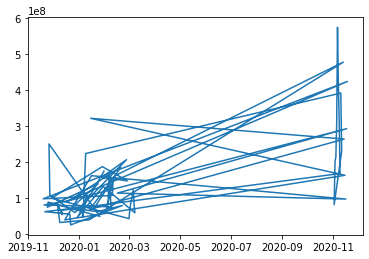

In [38]:
mergedata=pd.merge(pt_pullrequest, vol_df, left_index=True, right_index=True)
mergedata.sort_index()
plt.plot(mergedata['trade-volume'])

<AxesSubplot:xlabel='index', ylabel='trade-volume'>

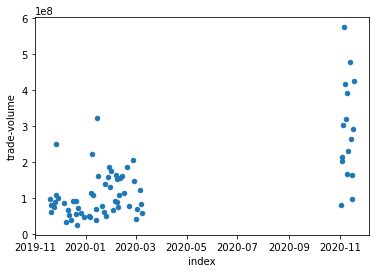

In [39]:
mergedata.reset_index().plot.scatter(x = 'index', y = 'trade-volume')

<AxesSubplot:xlabel='index', ylabel='Description'>

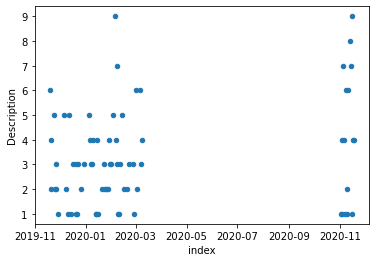

In [40]:
mergedata.reset_index().plot.scatter(x = 'index', y = 'Description')

<AxesSubplot:xlabel='trade-volume', ylabel='Description'>

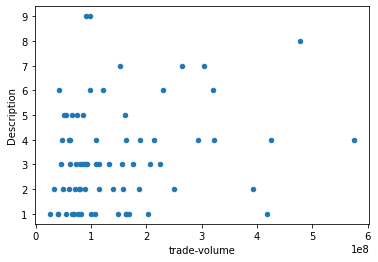

In [41]:
mergedata.reset_index().plot.scatter(x = 'trade-volume', y = 'Description')

In [42]:
print(mergedata)

            Description        date  Timestamp  trade-volume
2020-01-10            4   1/10/2020 2020-01-10  1.083238e+08
2020-01-05            5    1/5/2020 2020-01-05  5.018183e+07
2020-01-06            4    1/6/2020 2020-01-06  4.817756e+07
2020-01-07            3    1/7/2020 2020-01-07  1.140105e+08
2020-01-09            3    1/9/2020 2020-01-09  2.240038e+08
...                 ...         ...        ...           ...
2020-03-07            3    3/7/2020 2020-03-07  8.352223e+07
2020-03-08            4    3/8/2020 2020-03-08  5.923088e+07
2020-01-30            3   30/1/2020 2020-01-30  1.321567e+08
2019-12-30            3  30/12/2019 2019-12-30  4.643545e+07
2020-01-31            3   31/1/2020 2020-01-31  1.750493e+08

[72 rows x 4 columns]


<AxesSubplot:xlabel='Description', ylabel='trade-volume'>

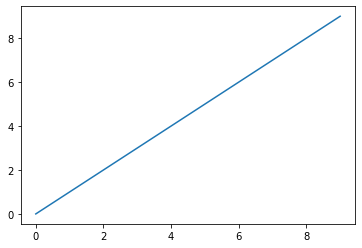

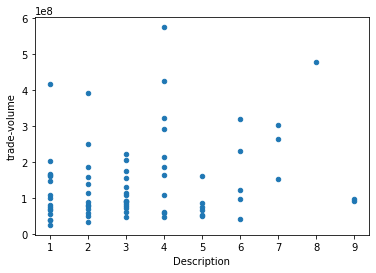

In [43]:
plt.plot(range(0, 10))
mergedata.reset_index().plot.scatter(x = 'Description', y = 'trade-volume')

In [45]:
#data = pd.read_csv('data.csv')  # load data set
#X = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
#Y = data.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
#linear_regressor = LinearRegression()  # create object for the class
#linear_regressor.fit(X, Y)  # perform linear regression
#Y_pred = linear_regressor.predict(X)  # make predictions
# https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d
 

In [46]:
data=mergedata
X = mergedata['Description'].values.reshape(-1, 1)  # values converts it into a numpy array
Y = mergedata['trade-volume'].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions


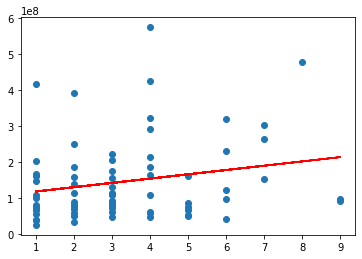

In [47]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [57]:
mergedata['trade']=mergedata['trade-volume']
mergedata['pullrequests']=mergedata['Description']
result = sm.ols(formula="trade ~ pullrequests", data=mergedata).fit()
print(result.params)

Intercept       1.063918e+08
pullrequests    1.195985e+07
dtype: float64


In [59]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  trade   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     3.405
Date:                Tue, 15 Dec 2020   Prob (F-statistic):             0.0692
Time:                        16:06:51   Log-Likelihood:                -1435.2
No. Observations:                  72   AIC:                             2874.
Df Residuals:                      70   BIC:                             2879.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.064e+08   2.51e+07      4.235   